In [2]:

import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.layers import Dropout 
from keras.utils import np_utils 
from keras.layers import Flatten
from keras.layers import Dense 
from keras.constraints import maxnorm
from keras.optimizers import SGD 
import keras

C:\Users\kiribyro\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading dataset

In [3]:
def get_annotations_map():
    valAnnotationsPath = r'C:/Users/kiribyro/Desktop/NN_and_AI/val/val_annotations.txt'
    valAnnotationsFile = open(valAnnotationsPath, 'r')
    valAnnotationsContents = valAnnotationsFile.read()
    valAnnotations = {}

    for line in valAnnotationsContents.splitlines():
        pieces = line.strip().split()
        valAnnotations[pieces[0]] = pieces[1]

    return valAnnotations

Loading 200 classes
loading training images...
finished loading training images
loading test images...
finished loading test images
0
0
1
1


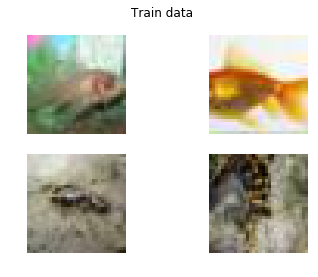

107
175
192
192


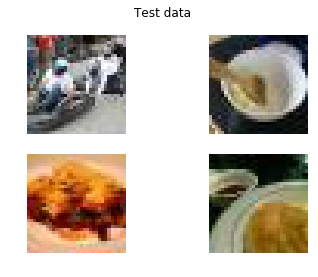

In [4]:


def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,32,32],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,32,32],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    valPath=path + '/val/images'
    for sChild in os.listdir(valPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(valPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images')#+str(i)

    return X_train,y_train,X_test,y_test

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    path=r'C:\Users\kiribyro\Desktop\NN_and_AI\tiny-imagenet-200\tiny-imagenet-200'
    X_train,y_train,X_test,y_test=load_images(path,200)#input data path & numbers of classes
    

    fig1 = plt.figure()
    fig1.suptitle('Train data')
    ax1 = fig1.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_train[0],(1,2,0)))
    print(y_train[0])
    ax2 = fig1.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_train[499],(1,2,0)))
    print(y_train[499])
    ax3 = fig1.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_train[500],(1,2,0)))
    print(y_train[500])
    ax4 = fig1.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_train[999],(1,2,0)))
    print(y_train[999])

    plt.show()

    fig2 = plt.figure()
    fig2.suptitle('Test data')
    ax1 = fig2.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_test[0],(1,2,0)))
    print(y_test[0])
    ax2 = fig2.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_test[49],(1,2,0)))
    print(y_test[49])
    ax3 = fig2.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_test[50],(1,2,0)))
    print(y_test[50])
    ax4 = fig2.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_test[99],(1,2,0)))
    print(y_test[99])
    
    plt.show()

In [5]:
X_train.shape

(100000, 3, 32, 32)

In [6]:
y_train.shape

(100000,)

# Model

In [7]:
# normalize inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [8]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [15]:

# Create the model 

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=(3, 32, 32), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

In [11]:

# Compile model e
epochs = 30
lrate = 0.001

In [12]:
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 2, 31, 32)         4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 15, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 15, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               61568     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               25800     
Total params: 91,496
Trainable params: 91,496
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 100000 samples, validate on 10000 samples
Epoch 1/30
100000/100000 [==============================] - 35s 353us/step - loss: 5.2092 - acc: 0.0102 - val_loss: 5.0401 - val_acc: 0.0208
Epoch 2/30
100000/100000 [==============================] - 37s 365us/step - loss: 4.9446 - acc: 0.0335 - val_loss: 4.8054 - val_acc: 0.0513
Epoch 3/30
100000/100000 [==============================] - 35s 350us/step - loss: 4.7852 - acc: 0.0515 - val_loss: 4.6876 - val_acc: 0.0648
Epoch 4/30
100000/100000 [==============================] - 40s 400us/step - loss: 4.6920 - acc: 0.0633 - val_loss: 4.6240 - val_acc: 0.0735
Epoch 5/30
100000/100000 [==============================] - 36s 363us/step - loss: 4.6246 - acc: 0.0717 - val_loss: 4.5591 - val_acc: 0.0841
Epoch 6/30
100000/100000 [==============================] - 35s 351us/step - loss: 4.5724 - acc: 0.0778 - val_loss: 4.5384 - val_acc: 0.0863
Epoch 7/30
100000/100000 [==============================] - 32s 320us/step - loss: 4.5295 - acc: 0.0819